In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from collections import  Counter

import torch
from fastai.vision import *
from fastai.metrics import *

np.random.seed(7)
torch.cuda.manual_seed_all(7)

import os

In [2]:
torch.cuda.is_available()

True

In [3]:
test_df = pd.read_csv('test_ApKoW4T.csv')
test_df.head()

,image
0,1007700.jpg
1,1011369.jpg
2,1051155.jpg
3,1062001.jpg
4,1069397.jpg


In [7]:
databunch = ImageDataBunch.from_csv(Path('images'), ds_tfms=None,
                                  csv_labels='cleaned.csv',
                                  valid_pct=0.1,
                                size=(140,210), bs=64).normalize(imagenet_stats)

# Add the test images to the DataBunch
test_img = ImageList.from_df(test_df, path='/home/jupyter/analytics_vidhya',
                             folder='test')
databunch.add_test(test_img)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


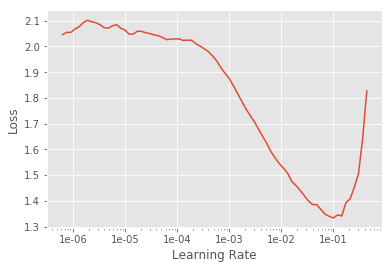

In [8]:
learner = cnn_learner(databunch, models.densenet121, metrics=accuracy)
learner.lr_find()
learner.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.706500,0.499195,0.799242,00:33
1,0.422967,0.389164,0.848485,00:32
2,0.256762,0.317635,0.886364,00:32
3,0.134431,0.285509,0.901515,00:32
4,0.068635,0.301307,0.912879,00:32


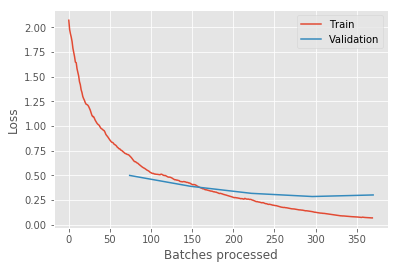

In [9]:
learner.fit_one_cycle(5, max_lr=slice(1e-04, 1e-02))
learner.recorder.plot_losses()

In [4]:
databunch = ImageDataBunch.from_csv(Path('images'), ds_tfms=get_transforms(),
                                  csv_labels='cleaned.csv',
                                  valid_pct=0.1,
                                size=(140,210), bs=64).normalize(imagenet_stats)

# Add the test images to the DataBunch
test_img = ImageList.from_df(test_df, path='/home/jupyter/analytics_vidhya',
                             folder='test')
databunch.add_test(test_img)

epoch,train_loss,valid_loss,accuracy,time
0,0.750837,0.504597,0.810606,00:52
1,0.472232,0.389366,0.861742,00:47
2,0.331240,0.310879,0.882576,00:47
3,0.244604,0.238560,0.912879,00:47
4,0.190086,0.234698,0.912879,00:47


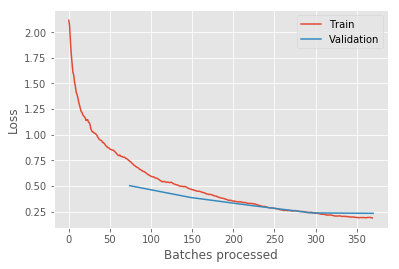

In [5]:
learner = cnn_learner(databunch, models.resnet101, metrics=accuracy)
learner.fit_one_cycle(5, max_lr=slice(1e-04, 1e-02))
learner.recorder.plot_losses()

In [6]:
gc.collect()

2869

In [ ]:
learner.purge()
torch.cuda.empty_cache()

epoch,train_loss,valid_loss,accuracy,time
0,0.591718,1.425634,0.655303,01:03
1,0.448626,0.582421,0.823864,01:02
2,0.355091,0.282581,0.880682,01:02
3,0.208497,0.193797,0.924242,01:03
4,0.136749,0.216057,0.928030,01:03


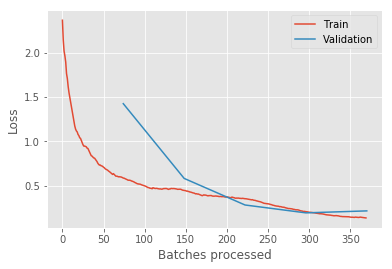

In [11]:
learner = cnn_learner(databunch, models.resnet101, metrics=accuracy)
learner.unfreeze()
learner.fit_one_cycle(5, max_lr=slice(1e-04, 1e-02))
learner.recorder.plot_losses()

In [12]:
import time

def prepare_submission_file(learner):
    ts = time.time()
    pred_labels = []

    for i in range(len(learner.data.test_ds)):
        temp_pred = str(learner.predict(learner.data.test_ds[i][0])[0])
        pred_labels.append(temp_pred)
    submission = pd.read_csv('Submission.csv')
    submission['category'] = pred_labels

    file_name = 'submission_{}.csv'.format(ts)
    submission.to_csv('Submission_Files/'+file_name, index=False)
    return 'Submission file created successfully here {}'.format('Submission_Files/'+file_name)

In [13]:
prepare_submission_file(learner)

'Submission file created successfully here Submission_Files/submission_1559989811.6190267.csv'

In [14]:
learner.save('stage-3-resnet101')

In [27]:
# Combining predictions
prepend = 'Submission_Files/'

submission_initial = pd.read_csv(prepend+'submission_1558782906.0229204.csv')
submission_three = pd.read_csv(prepend+'submission_1559987410.988816.csv')
submission_four = pd.read_csv(prepend+'submission_1559989811.6190267.csv')

In [28]:
submission_combined = submission_three.copy()

In [30]:
submission_combined['category'] = pd.concat([submission_three.category, 
                                             submission_four.category, submission_initial.category],
                                             axis=1).max(axis=1)
file_name = 'submission_{}.csv'.format(time.time())
submission_combined.to_csv('Submission_Files/'+file_name, index=False)